In [54]:
# Osteoporosis Risk Prediction Project

In [71]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [72]:
# STEP 1: Load and Explore the Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("osteoporosis.csv")

# Basic info
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

# Preview the data
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [73]:
# STEP 2: Data Cleaning and Preprocessing
from sklearn.preprocessing import LabelEncoder

# Drop ID column if not useful
df.drop('Id', axis=1, inplace=True)

# Encode categorical variables
label_cols = ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
              'Physical Activity', 'Smoking', 'Alcohol Consumption', 
              'Medical Conditions', 'Medications', 'Prior Fractures', 'Osteoporosis']

le = LabelEncoder()
for col in label_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

# Encode 'Body Weight' if it's categorical
if df['Body Weight'].dtype == 'object':
    df['Body Weight'] = le.fit_transform(df['Body Weight'])

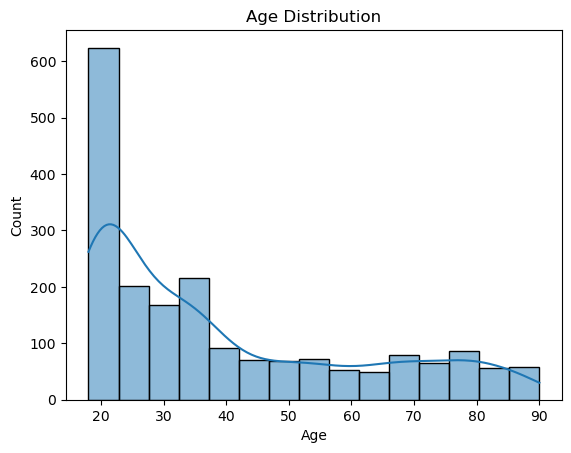

In [74]:
# STEP 3: Exploratory Data Analysis
# Histograms
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

In [76]:
# mapping
df['Calcium Intake'] = df['Calcium Intake'].map({'Low': 0, 'Adequate': 1})
df['Vitamin D Intake'] = df['Vitamin D Intake'].map({'Insufficient': 0, 'Sufficient': 1})

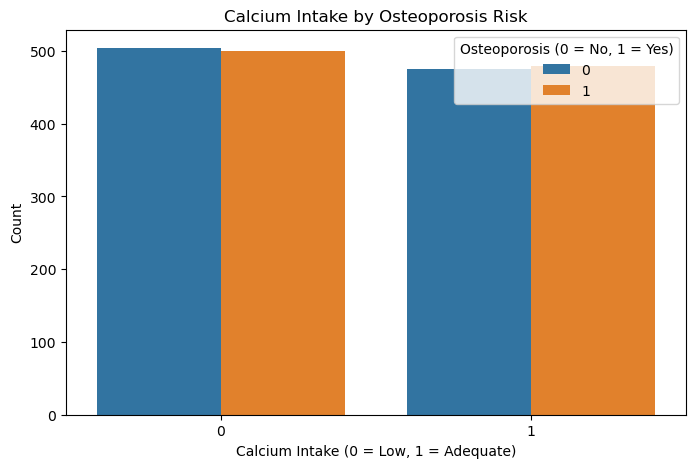

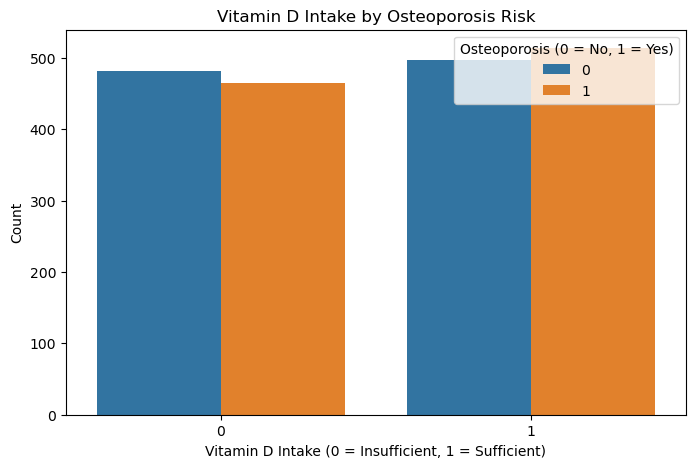

In [77]:
# Countplot for Calcium Intake vs Osteoporosis
plt.figure(figsize=(8, 5))
sns.countplot(x='Calcium Intake', hue='Osteoporosis', data=df)
plt.title('Calcium Intake by Osteoporosis Risk')
plt.xlabel('Calcium Intake (0 = Low, 1 = Adequate)')
plt.ylabel('Count')
plt.legend(title='Osteoporosis (0 = No, 1 = Yes)')
plt.show()

# Countplot for Vitamin D Intake vs Osteoporosis
plt.figure(figsize=(8, 5))
sns.countplot(x='Vitamin D Intake', hue='Osteoporosis', data=df)
plt.title('Vitamin D Intake by Osteoporosis Risk')
plt.xlabel('Vitamin D Intake (0 = Insufficient, 1 = Sufficient)')
plt.ylabel('Count')
plt.legend(title='Osteoporosis (0 = No, 1 = Yes)')
plt.show()

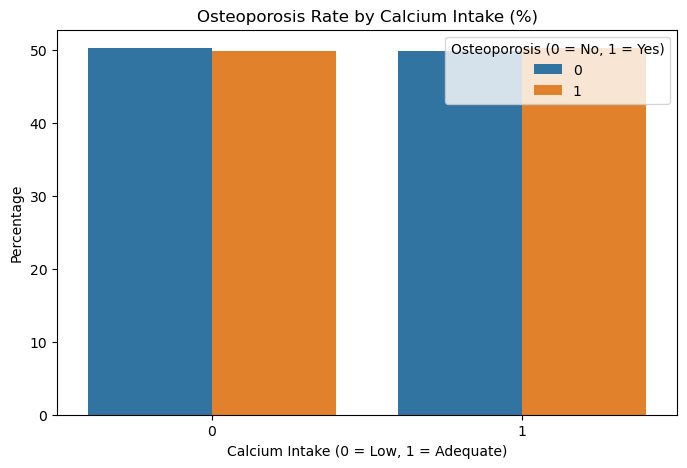

In [78]:
# Calculate percentage of osteoporosis cases by Calcium Intake
percent_df = df.groupby(['Calcium Intake', 'Osteoporosis']).size().reset_index(name='count')
total_per_group = percent_df.groupby('Calcium Intake')['count'].transform('sum')
percent_df['percentage'] = (percent_df['count'] / total_per_group) * 100

# Plot percentage bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Calcium Intake', y='percentage', hue='Osteoporosis', data=percent_df)
plt.title('Osteoporosis Rate by Calcium Intake (%)')
plt.xlabel('Calcium Intake (0 = Low, 1 = Adequate)')
plt.ylabel('Percentage')
plt.legend(title='Osteoporosis (0 = No, 1 = Yes)')
plt.show()

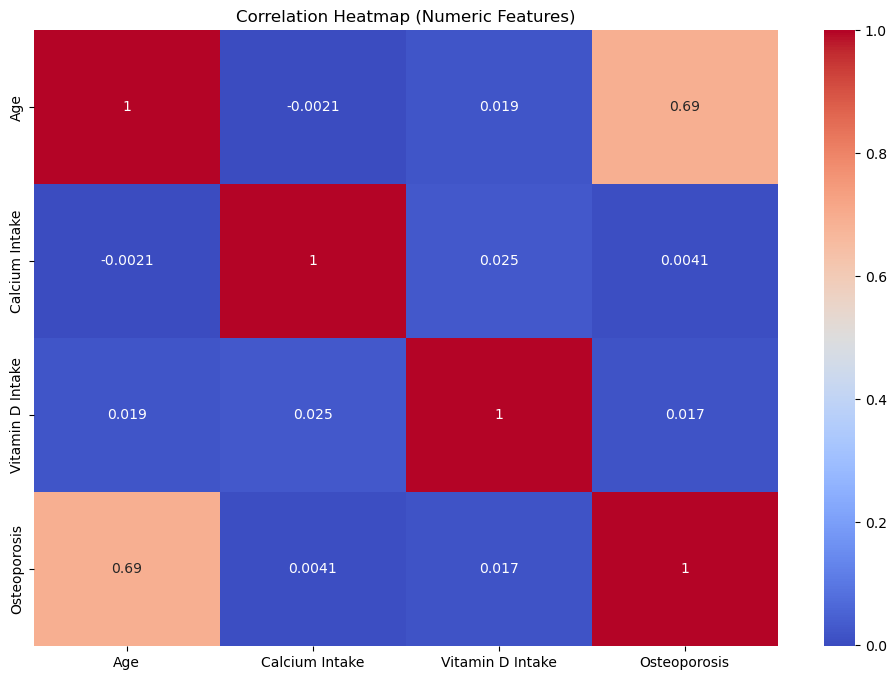

In [79]:
# Correlation heatmap (numerical columns only)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [80]:
# STEP 4: Feature Engineering
X = df.drop('Osteoporosis', axis=1)
y = df['Osteoporosis']

In [81]:
df_cleaned = df.dropna()

In [82]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        le = LabelEncoder()
        df_cleaned[col] = le.fit_transform(df_cleaned[col])
        label_encoders[col] = le  # optional if you want to inverse later

In [83]:
# Define X and y
X = df_cleaned.drop("Osteoporosis", axis=1)
y = df_cleaned["Osteoporosis"]

In [84]:
# STEP 5: Train-Test Split
# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression (as example)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict & evaluate
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       193
           1       0.83      0.78      0.80       199

    accuracy                           0.81       392
   macro avg       0.81      0.81      0.81       392
weighted avg       0.81      0.81      0.81       392



In [85]:
# STEP 6: Train and Evaluate Multiple Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       193
           1       0.83      0.78      0.80       199

    accuracy                           0.81       392
   macro avg       0.81      0.81      0.81       392
weighted avg       0.81      0.81      0.81       392

Confusion Matrix:
 [[160  33]
 [ 43 156]]

--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       193
           1       0.83      0.84      0.83       199

    accuracy                           0.83       392
   macro avg       0.83      0.83      0.83       392
weighted avg       0.83      0.83      0.83       392

Confusion Matrix:
 [[159  34]
 [ 32 167]]

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       193
           1       0.92      0.73      0.81       199

    accuracy           

In [86]:
# STEP 7: Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

params_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

grid_rf = GridSearchCV(RandomForestClassifier(), params_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)

print("\nBest Parameters:", grid_rf.best_params_)
print("Best F1 Score:", grid_rf.best_score_)


Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Best F1 Score: 0.8353216374269005


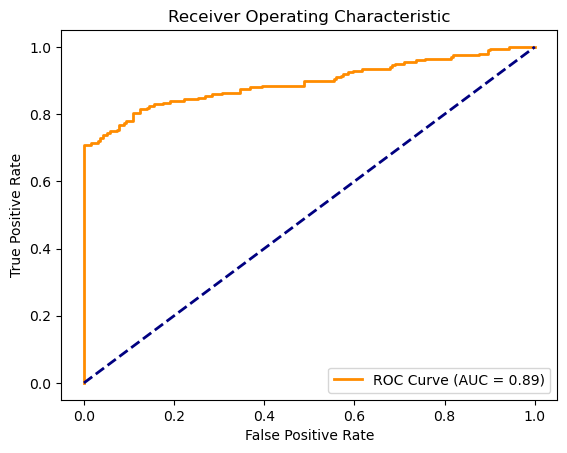

In [87]:
# STEP 8: Final Evaluation and Visualization
from sklearn.metrics import roc_curve, auc

best_model = grid_rf.best_estimator_
y_proba = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()